In [1]:
import pandas as pd 
import numpy as np 


In [6]:
from sklearn.datasets import make_regression

In [7]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)


In [8]:
x

array([[-0.51181072,  0.06769611],
       [ 0.74602043, -1.57105552],
       [-0.23350417, -1.24721121],
       ...,
       [ 1.69831128, -1.38538496],
       [ 0.42779197,  0.80159231],
       [-0.69125038, -0.58710592]])

In [9]:
y

array([-2.92149186e+01, -4.13527095e+01, -9.38997890e+01, -5.91343936e+01,
        1.56400479e+02,  9.17264096e+01, -1.51008399e+02,  1.28325921e+02,
        1.74767199e+02, -2.19154883e+01,  2.84670106e-02, -6.43881091e+01,
       -2.02449021e-01, -1.10431261e+02, -1.86972063e+02,  7.44264112e+00,
        3.20946462e+01, -1.05077860e+02,  6.66041168e+00,  4.15212947e+01,
        1.32945195e+02, -9.44936927e+00,  1.32275318e+01,  1.23901751e+02,
       -9.98130635e+01, -1.13307102e+02,  8.45632837e+00,  1.28872563e+02,
       -1.14253669e+01, -3.53412761e+01,  1.40674238e+02, -4.43930508e+00,
        1.60609510e+02, -3.61616684e+01, -2.39272501e+01,  8.68003366e+01,
       -6.42940437e+01, -8.47826747e+01, -1.07709236e+02, -9.34312730e+01,
       -9.61375642e+01, -1.05056299e+02,  9.73953940e+01, -9.98994669e+01,
        6.75921779e+01, -1.05026231e+02, -3.19411484e-01,  1.04159307e+02,
        3.14858818e+02, -1.15677060e+02, -1.08009079e+00,  1.92265225e+01,
        6.22591212e+01,  

In [10]:
pd.DataFrame(x)[0]

0     -0.511811
1      0.746020
2     -0.233504
3     -0.712680
4      1.507249
         ...   
995    0.503500
996    0.482167
997    1.698311
998    0.427792
999   -0.691250
Name: 0, Length: 1000, dtype: float64

In [11]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

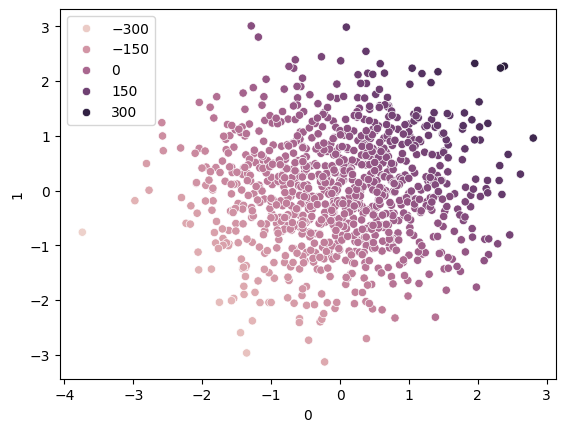

In [13]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [15]:

from sklearn.svm import SVR



In [16]:
svr=SVR(kernel='linear')

In [17]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [18]:
svr.coef_

array([[73.05933672, 60.35238128]])

In [19]:
y_pred=svr.predict(x_test)

In [20]:
y_pred

array([-152.8373202 ,  154.1468748 , -114.3758663 ,   25.18674865,
         27.2720009 ,   65.58374892, -106.87306897,  -94.50676982,
        -64.64951466,   23.77267306,  -17.00529054,  -44.04425896,
         99.94530193,   95.68929202, -136.52949853,  -85.08010646,
        -48.8515104 ,  160.52350423, -118.21827207,  -22.37992978,
        -75.39889801,  146.10331169,   44.31537507,  104.29774593,
         91.02549285,   32.19487549,  -46.96325158,   -5.31217133,
        -12.02729714,   35.20221104,   54.85851923,   -4.68327277,
        -95.00694616,  -13.70769564, -122.20496016,  105.36527591,
        -35.10530658,  -60.65166221,  -25.38354338,  -20.27502504,
        -98.0786846 ,   14.22117493,   84.69628817,  -94.53370436,
        -81.03520648,   81.37815728,  -11.88386776, -139.48415822,
         39.98551444,  -44.69821475,  124.33350601,   70.53266134,
        167.3977961 ,   74.5662888 ,   40.57360259,  -13.21128045,
         52.66547419, -176.42629516,   40.15373495,   11.21024

In [21]:
from sklearn.metrics import r2_score

In [23]:
score=r2_score(y_pred,y_test)

In [24]:
score

0.9986527453696027

In [25]:
from sklearn.model_selection import GridSearchCV

para={'C':[0,0.1,10,100,1000],
      'gamma':[1,0.1,0.01,0.001,0.0001],
      'kernel':['linear']
}

In [26]:
grid=GridSearchCV(SVR(),param_grid=para,refit=True,cv=5,verbose=3)

In [28]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .........C=0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ......C=0, gamma=0.01, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ......C=0, gamma=0.01, kernel=line

/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_p

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [29]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [30]:
y_pred_1=grid.predict(x_test)

In [31]:
score=r2_score(y_pred_1,y_test)

In [32]:
score

0.9987126499524287